In [1]:
import time
import numpy as np
from numba import njit, prange, cuda, types, float32, float64, int32
import matplotlib.pyplot as plt

In [2]:
@njit
def testpoint(rp , ri, max_iter):
    crp = rp
    cri = ri
    count = 0
    for i in range(0, max_iter):
        temp = crp * crp - cri * cri + rp
        cri = crp * cri * 2.0 + ri
        crp = temp
         
        if (crp * crp + cri * cri) > 4.0:
            break
            
    return i

@njit
def mandelbrot(m : int, npoints, max_iter, eps):
    for i in range(0, npoints):
        for j in range(0, npoints):
            rp = -2.0 + 3.0 * float(i) / float(npoints) + eps
            ri = -1.5 + 3.0 * float(j) / float(npoints) + eps
            
            m[i,j] = testpoint(rp, ri, max_iter)

In [3]:
npoints = 2000
max_iter = 100
eps = 1.0e-6

m = np.zeros(shape=(npoints,npoints), dtype=int)

start=time.time()
mandelbrot(m, npoints, max_iter, eps)
end=time.time()

n = np.count_nonzero(m < max_iter-1) # convert to bool

print('Elapsed time: ', end-start)

area = 3.0 * 3.0 * float(npoints*npoints-n) / float(npoints * npoints)
error = area / npoints

print('area: ', area, n)
print('error: ', error)

Elapsed time:  0.6819705963134766
area:  1.54638675 3312717
error:  0.000773193375


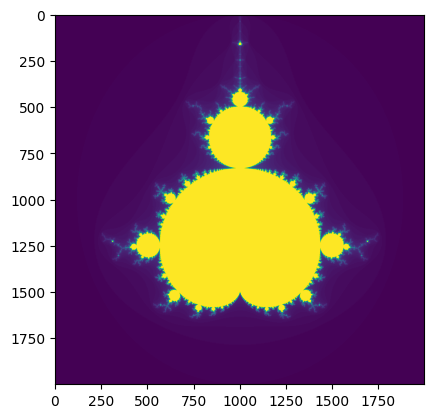

In [4]:
ax = plt.axes()
ax.set_aspect('equal')
plt.imshow(m)

In [49]:
@cuda.jit
def testpoint(rp , ri, max_iter):
    # todo

@cuda.jit
def mandelbrot(m, npoints, max_iter, eps):
    # todo

In [59]:
npoints = 2000
max_iter = 1000
eps = 1.0e-6

m = np.zeros(shape=(npoints,npoints), dtype=np.int32)

threadsperblock = # todo
blockspergrid_x = # todo
blockspergrid_y = # todo
blockspergrid = # todo

start=time.time()
# todo: call cuda kernel
end=time.time()

print('Elapsed time: ', end-start)

n = np.count_nonzero(m < max_iter-1) # convert to bool

area = 3.0 * 3.0 * float(npoints*npoints-n) / float(npoints * npoints)
error = area / npoints

print('area: ', area, n)
print('error: ', error)

Elapsed time:  10.317662954330444
area:  1.5072874233398437 3410016746
error:  2.3551365989685056e-05


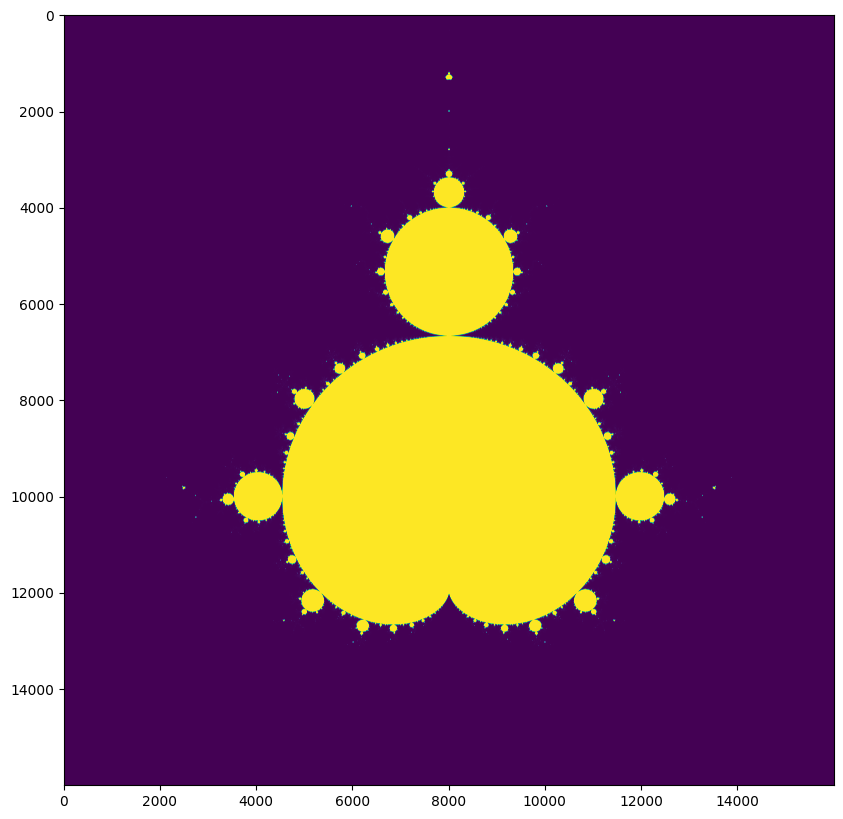

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(m)

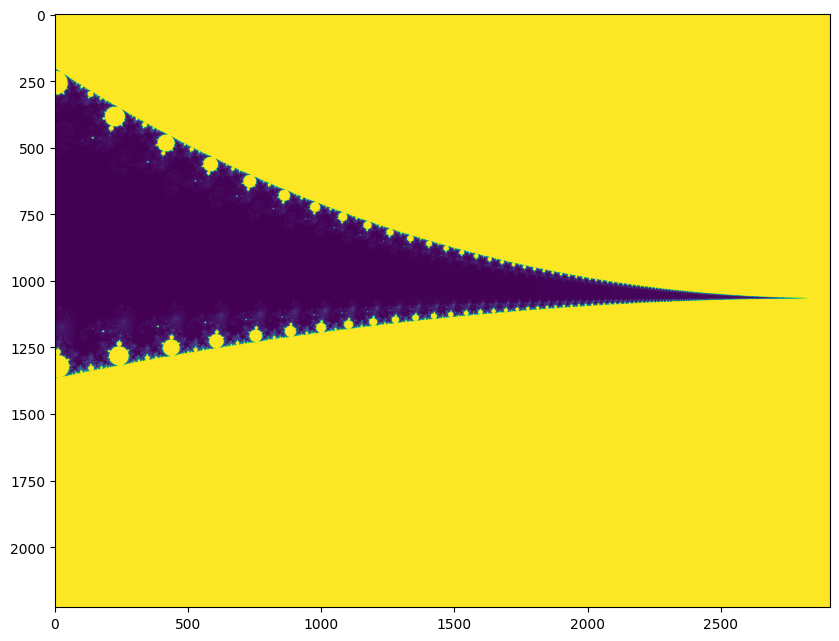

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(m[int(npoints/2.5):int(npoints/2.3),int(npoints/2.2):int(npoints/2.0)])

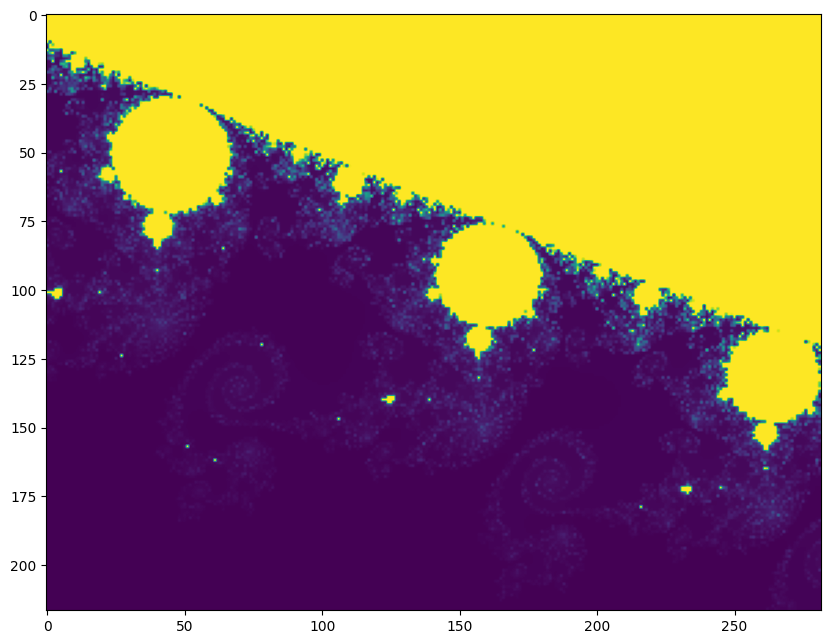

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(m[int(npoints/2.44):int(npoints/2.42),int(npoints/2.14):int(npoints/2.12)])

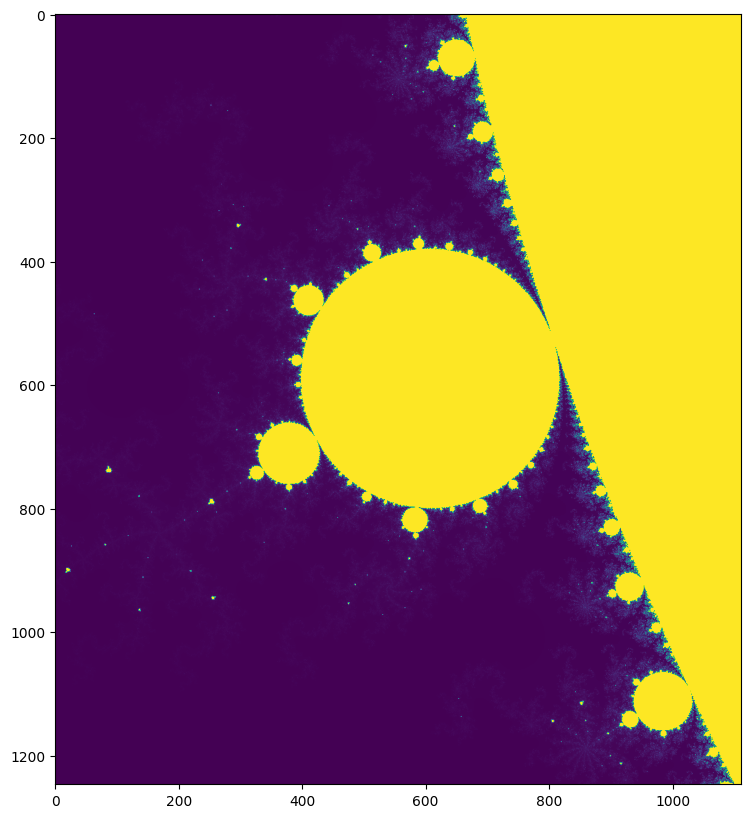

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(m[int(npoints/2.85):int(npoints/2.7),int(npoints/2.45):int(npoints/2.35)])